# Introduction

#### Problem: A school district wants to analyze its hiring practices based off scores and information gathered on teachers the school district has interviewed

# Setting up dataset

In [1]:
#reading in the libraries
import pandas as pd
import numpy as np

In [2]:
#importing data
df = pd.read_csv('Data1.csv')

In [3]:
df.head()

,Unique ID,App year,Mindeset 1 - Learning Orientation,Mindset 2 - Confidence,Mindset 3 - Interest in Student Development,Mindset 4 - Conscientiousness,Accomplishemnt 1 - Undergraduate GPA,Accomplishemnt 2 - Academic preparation,Accomplishment 3 - Teacher Certification,Skill 1 - Problem-solving,...,Began teaching,Retained,Principal Evaluation,Benchmark Achieved,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1.0,2014.0,2.0,4.0,4.0,3.0,4.00,4.0,0.0,3.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2013.0,1.0,4.0,5.0,1.0,3.64,2.0,0.0,1.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2013.0,3.0,3.5,3.0,4.0,3.39,3.0,0.0,2.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2014.0,5.0,3.5,4.0,4.5,3.45,4.0,0.0,3.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2013.0,1.0,3.5,3.5,3.0,3.83,3.0,0.0,3.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#only select columns 1 to 18 (2nd to 19th)
df1 = df.iloc[:,1:19]

In [5]:
#check for rows and columns
df1.shape

(33634, 18)

In [6]:
#check for missing values
df1.isnull().sum()

App year                                           1
Mindeset 1 - Learning Orientation                 20
Mindset 2 - Confidence                            20
Mindset 3 - Interest in Student Development       20
Mindset 4 - Conscientiousness                     20
Accomplishemnt 1 - Undergraduate GPA              29
Accomplishemnt 2 - Academic preparation            1
Accomplishment 3 - Teacher Certification           1
Skill 1 - Problem-solving                         20
Skill 2 - Communication                           20
Skill 3 - Classroom Suitability                   20
Skill 4 - Second or Third Language Spoken          1
Skill 5 - Conflict Management                      1
Admitted                                           1
Began teaching                                     1
Retained                                       22205
Principal Evaluation                           22206
Benchmark Achieved                             25818
dtype: int64

In [7]:
#drop all the missing values for simiplicity and cannot fully evaluate those candidates
df2 = df1.dropna()

In [8]:
df2.shape

(7751, 18)

In [9]:
df3 = pd.get_dummies(df2, drop_first=True)

In [10]:
df3.head()

,App year,Mindeset 1 - Learning Orientation,Mindset 2 - Confidence,Mindset 3 - Interest in Student Development,Mindset 4 - Conscientiousness,Accomplishemnt 1 - Undergraduate GPA,Accomplishemnt 2 - Academic preparation,Accomplishment 3 - Teacher Certification,Skill 1 - Problem-solving,Skill 2 - Communication,Skill 3 - Classroom Suitability,Skill 4 - Second or Third Language Spoken,Skill 5 - Conflict Management,Principal Evaluation,Benchmark Achieved,Admitted_Y,Retained_Y
5,2014.0,2.0,3.0,4.0,4.0,3.71,4.0,0.0,3.0,3.0,3.67,2.0,1.0,86.0,67.05,1,1
6,2013.0,4.0,3.5,4.0,4.0,3.70,2.0,0.0,3.0,5.0,3.34,2.0,2.0,86.0,130.00,1,1
9,2013.0,4.0,4.0,4.0,3.0,3.40,5.0,0.0,3.0,4.0,2.67,2.0,5.0,90.0,60.00,1,1
11,2014.0,4.0,4.0,3.0,4.0,3.31,3.0,1.0,3.0,4.0,3.67,2.0,5.0,100.0,45.63,1,1
16,2013.0,2.0,4.0,4.0,4.0,3.61,5.0,1.0,3.0,3.0,3.00,2.0,1.0,100.0,3.00,1,1


# Visualizing correlations of data

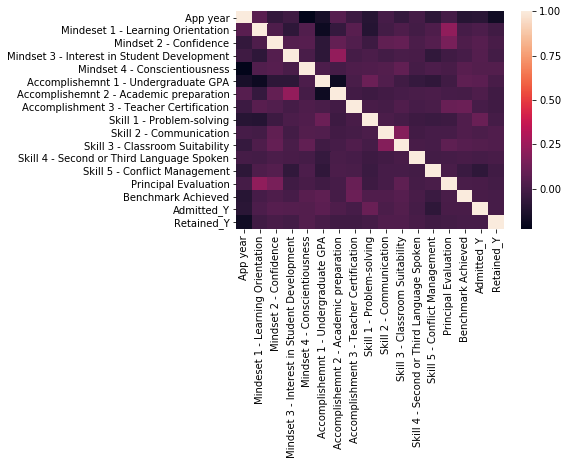

In [11]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df3.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Insight from correlation matrix
* looks like principal evaluation and learning orientation are correlated
* academic preparation accomplishment 2 and interest in student dev are correlated

# Regression

In [13]:
#lets try a regression

import statsmodels.api as sm
X = df3.iloc[:,1:13]
X = sm.add_constant(X)
y = df3['Benchmark Achieved']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Benchmark Achieved   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     16.94
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           2.21e-36
Time:                        12:50:12   Log-Likelihood:                -38556.
No. Observations:                7751   AIC:                         7.714e+04
Df Residuals:                    7738   BIC:                         7.723e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          19.1083      8.426      2.268      0.023       2.590      35.626
Mindeset 1 - Learning Orientation               0.3747      0.532      0.704      0.482      -0.669       1.418
Mindset 2 - Confidence                          1.6801      0.816      2.060      0.039       0.081       3.279
Mindset 3 - Interest in Student Development    -0.0112      0.518     -0.022      0.983      -1.026       1.003
Mindset 4 - Conscientiousness                   2.1078      0.514      4.101      0.000       1.100       3.115
Accomplishemnt 1 - Undergraduate GPA            7.8443      1.286      6.100      0.000       5.323      10.365
Accomplishemnt 2 - Academic preparation         0.5865      0.509      1.152      0.249      -0.411       1.584
Accomplishment 3 - Teacher Certification       13.1538      1.357      9.694      0.000      10.494      15.814
Skill 1 - Problem-solving                       1.9310      1.076      1.795      0.073      -0.178       4.040
Skill 2 - Communication                         0.7481      0.522      1.432      0.152      -0.276       1.772
Skill 3 - Classroom Suitability                 2.8415      0.790      3.595      0.000       1.292       4.391
Skill 4 - Second or Third Language Spoken       0.5843      0.751      0.778      0.436      -0.887       2.056
Skill 5 - Conflict Management                  -0.9612      0.301     -3.189      0.001      -1.552      -0.370
==============================================================================
Omnibus:                     1165.977   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3782.301
Skew:                           0.766   Prob(JB):                         0.00
Kurtosis:                       6.060   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Random Forest

In [15]:
#let's try random forest
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[-20:]
indices

array([ 6,  7, 10,  5,  8,  3, 11,  2,  1,  0,  9,  4], dtype=int64)

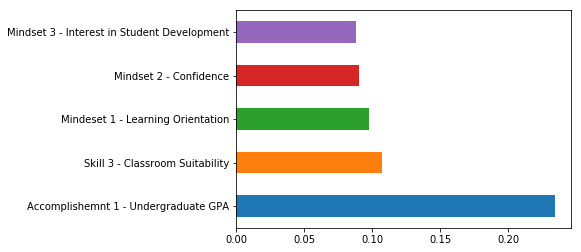

In [17]:
(pd.Series(rfr.feature_importances_, index=X.columns)
   .nlargest(5)
   .plot(kind='barh'))

# Use "principal evaluation" as dependent variable

In [18]:
# y=df3['Principal Evaluation']

In [19]:
#lets try a regression

import statsmodels.api as sm
X = df3.iloc[:,1:13]
X = sm.add_constant(X)
y = df3['Principal Evaluation']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Principal Evaluation   R-squared:                       0.079
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                     55.50
Date:                  Thu, 31 Jan 2019   Prob (F-statistic):          4.17e-129
Time:                          12:50:18   Log-Likelihood:                -27674.
No. Observations:                  7751   AIC:                         5.537e+04
Df Residuals:                      7738   BIC:                         5.546e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          61.1632      2.070     29.550      0.000      57.106      65.221
Mindeset 1 - Learning Orientation               2.4825      0.131     18.985      0.000       2.226       2.739
Mindset 2 - Confidence                          2.5376      0.200     12.664      0.000       2.145       2.930
Mindset 3 - Interest in Student Development    -0.0519      0.127     -0.408      0.683      -0.301       0.197
Mindset 4 - Conscientiousness                  -0.1527      0.126     -1.209      0.227      -0.400       0.095
Accomplishemnt 1 - Undergraduate GPA            1.0254      0.316      3.246      0.001       0.406       1.645
Accomplishemnt 2 - Academic preparation         0.0907      0.125      0.725      0.468      -0.154       0.336
Accomplishment 3 - Teacher Certification        2.4890      0.333      7.467      0.000       1.836       3.142
Skill 1 - Problem-solving                      -0.1393      0.264     -0.527      0.598      -0.657       0.379
Skill 2 - Communication                        -0.1971      0.128     -1.536      0.125      -0.449       0.054
Skill 3 - Classroom Suitability                 1.0007      0.194      5.155      0.000       0.620       1.381
Skill 4 - Second or Third Language Spoken      -0.0650      0.184     -0.352      0.725      -0.426       0.297
Skill 5 - Conflict Management                  -0.0020      0.074     -0.028      0.978      -0.147       0.143
==============================================================================
Omnibus:                      215.595   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.679
Skew:                          -0.352   Prob(JB):                     9.75e-45
Kurtosis:                       2.636   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 0  7  8 11  2  6  9  1  3  4 12 10  5]


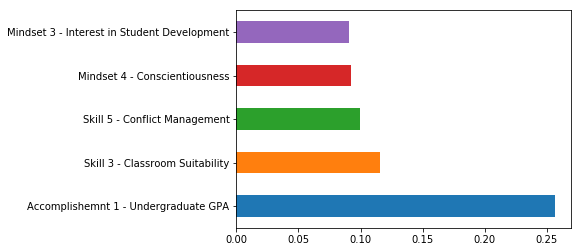

In [20]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X, y)

importances = rfr.feature_importances_
indices = np.argsort(importances)[-20:]
print(indices)

(pd.Series(rfr.feature_importances_, index=X.columns)
   .nlargest(5)
   .plot(kind='barh'))

# LET'S RENAME AND RERUN

In [21]:
#let's rename the columns
df3.columns = ['App year','m1','m2','m3','m4', 'a1','a2','a3','s1','s2','s3','s4','s5','PE','Benchmark','Admitted','Retained']

In [22]:
df3.head()

,App year,m1,m2,m3,m4,a1,a2,a3,s1,s2,s3,s4,s5,PE,Benchmark,Admitted,Retained
5,2014.0,2.0,3.0,4.0,4.0,3.71,4.0,0.0,3.0,3.0,3.67,2.0,1.0,86.0,67.05,1,1
6,2013.0,4.0,3.5,4.0,4.0,3.70,2.0,0.0,3.0,5.0,3.34,2.0,2.0,86.0,130.00,1,1
9,2013.0,4.0,4.0,4.0,3.0,3.40,5.0,0.0,3.0,4.0,2.67,2.0,5.0,90.0,60.00,1,1
11,2014.0,4.0,4.0,3.0,4.0,3.31,3.0,1.0,3.0,4.0,3.67,2.0,5.0,100.0,45.63,1,1
16,2013.0,2.0,4.0,4.0,4.0,3.61,5.0,1.0,3.0,3.0,3.00,2.0,1.0,100.0,3.00,1,1


## rerun regression for Benchmark

In [23]:
#lets try a regression

import statsmodels.api as sm
X = df3[['m2','m4','a1','a3','s3','s5']]
X = sm.add_constant(X)
y = df3['Benchmark']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Benchmark   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     32.66
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           4.46e-39
Time:                        12:50:24   Log-Likelihood:                -38559.
No. Observations:                7751   AIC:                         7.713e+04
Df Residuals:                    7744   BIC:                         7.718e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1480      6.399      4.867      0.000      18.603      43.693
m2             1.8100      0.811      2.231      0.026       0.220       3.400
m4             2.1649      0.513      4.219      0.000       1.159       3.171
a1             7.7063      1.233      6.252      0.000       5.290      10.122
a3            13.1978      1.354      9.744      0.000      10.543      15.853
s3             3.0464      0.778      3.917      0.000       1.522       4.571
s5            -0.9748      0.300     -3.244      0.001      -1.564      -0.386
==============================================================================
Omnibus:                     1162.968   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3762.799
Skew:                           0.765   Prob(JB):                         0.00
Kurtosis:                       6.051   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## rerun regression for Principal Evaluations

In [24]:
#lets try a regression for PE

import statsmodels.api as sm
X = df3[['m1','m2','a1','a3','s3']]
X = sm.add_constant(X)
y = df3['PE']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          6.63e-135
Time:                        12:54:25   Log-Likelihood:                -27676.
No. Observations:                7751   AIC:                         5.536e+04
Df Residuals:                    7745   BIC:                         5.541e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2059      1.662     36.230      0.000      56.948      63.463
m1             2.4806      0.129     19.192      0.000       2.227       2.734
m2             2.5153      0.199     12.648      0.000       2.125       2.905
a1             0.9492      0.307      3.090      0.002       0.347       1.551
a3             2.4816      0.333      7.449      0.000       1.829       3.135
s3             0.9271      0.190      4.868      0.000       0.554       1.300
==============================================================================
Omnibus:                      216.472   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.873
Skew:                          -0.351   Prob(JB):                     8.84e-45
Kurtosis:                       2.633   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## If teacher certification is so important, how many of the teachers have certifications in the dataset? - About 10%

In [30]:
#checking how many teachers have certifications


print(742/7009)
df3['a3'].value_counts()


0.10586388928520474


0.0    7009
1.0     742
Name: a3, dtype: int64